In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
from sklearn.preprocessing import StandardScaler

In [89]:
data = pd.read_csv("all_data.csv")

In [90]:
#disable scientific notation
pd.options.display.float_format = '{:.2f}'.format
#disable warnings
warnings.filterwarnings("ignore")
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.30,77860932152.00
1,Chile,2001,77.30,70979923960.00
2,Chile,2002,77.80,69736811435.00
3,Chile,2003,77.90,75643459840.00
4,Chile,2004,78.00,99210392858.00


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [92]:
data.isna()

,Country,Year,Life expectancy at birth (years),GDP
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
91,False,False,False,False
92,False,False,False,False
93,False,False,False,False
94,False,False,False,False


In [93]:
data.Country.value_counts()

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64

In [94]:
data.Year.value_counts()

2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: Year, dtype: int64

In [95]:
data =data.rename(columns={"Life expectancy at birth (years)": "leab"})

data["Country"] = data["Country"].replace("United States of America", "USA")

data["Year"] = data["Year"].apply(str)

In [96]:
data.describe()

,leab,GDP
count,96.00,96.00
mean,72.79,3880498570768.40
std,10.67,5197561310975.92
min,44.30,4415702800.00
25%,74.47,173301750000.00
50%,76.75,1280220000000.00
75%,78.90,4067510000000.00
max,81.00,18100000000000.00


In [97]:
data.groupby("Country")["leab", "GDP"].describe()

leab                                            GDP  \
         count  mean  std   min   25%   50%   75%   max count   
Country                                                         
Chile    16.00 78.94 1.06 77.30 77.97 79.00 79.83 80.50 16.00   
China    16.00 74.26 1.32 71.70 73.40 74.45 75.25 76.10 16.00   
Germany  16.00 79.66 0.97 78.00 78.95 79.85 80.53 81.00 16.00   
Mexico   16.00 75.72 0.62 74.80 75.22 75.65 76.15 76.70 16.00   
USA      16.00 78.06 0.83 76.80 77.42 78.15 78.72 79.30 16.00   
Zimbabwe 16.00 50.09 5.94 44.30 45.17 47.40 55.33 60.70 16.00   

                                                               \
                      mean              std               min   
Country                                                         
Chile      169788845015.31   76878841264.91    69736811435.00   
China     4957713750000.00 3501095794796.97  1211350000000.00   
Germany   3094775625000.00  667486247917.95  1949950000000.00   
Mexico     976650625000.00  209571645310.42   683648000000.00   
USA      14075000000000.00 2432693979932.54 10300000000000.00   
Zimbabwe     9062579595.06    4298309546.64     4415702800.00   

                                                                \
                       25%               50%               75%   
Country                                                          
Chile       93873027681.50   172997500000.00   244951500000.00   
China     1881585000000.00  4075195000000.00  7819550000000.00   
Germany   2740870000000.00  3396350000000.00  3596077500000.00   
Mexico     763091000000.00  1004375500000.00  1156992500000.00   
USA      12100000000000.00 14450000000000.00 15675000000000.00   
Zimbabwe     5748309350.00     6733671150.00    12634460624.75   

                            
                       max  
Country                     
Chile      278384000000.00  
China    11064700000000.00  
Germany   3890610000000.00  
Mexico    1298460000000.00  
USA      18100000000000.00  
Zimbabwe    16304667807.00

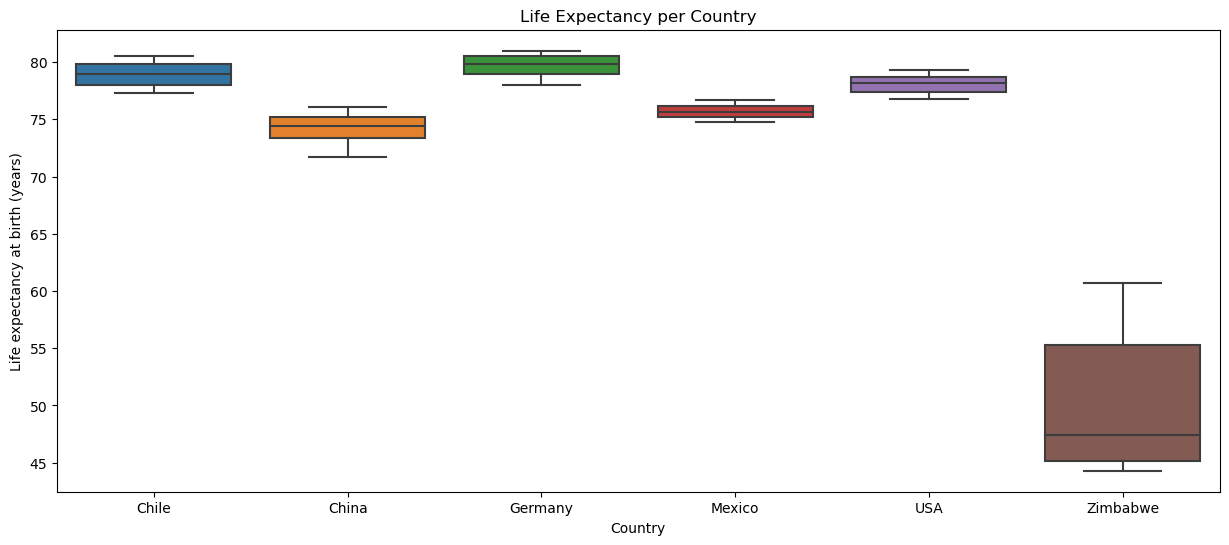

In [98]:
sns.boxplot(data = data, x = "Country", y = "leab")
plt.title("Life Expectancy per Country")
plt.ylabel("Life expectancy at birth (years)")
plt.show()
plt.close()

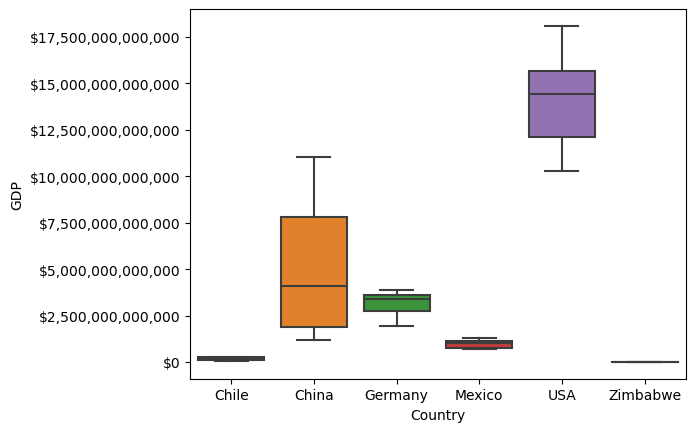

In [99]:
ax = sns.boxplot(data = data, x = "Country", y = "GDP")
#disable scientific notation
ax.ticklabel_format(style="plain", axis="y")
#format y-notations
formatter = ticker.StrMethodFormatter("${x:,.0f}")
ax.yaxis.set_major_formatter(formatter)

plt.show()
plt.close()

In [100]:
data_chile = data[data["Country"] == "Chile"]
data_usa = data[data["Country"] == "USA"]
data_zimbabwe = data[data["Country"] == "Zimbabwe"]
data_china = data[data["Country"] == "China"]
data_germany = data[data["Country"] == "Germany"]
data_mexico = data[data["Country"] == "Mexico"]


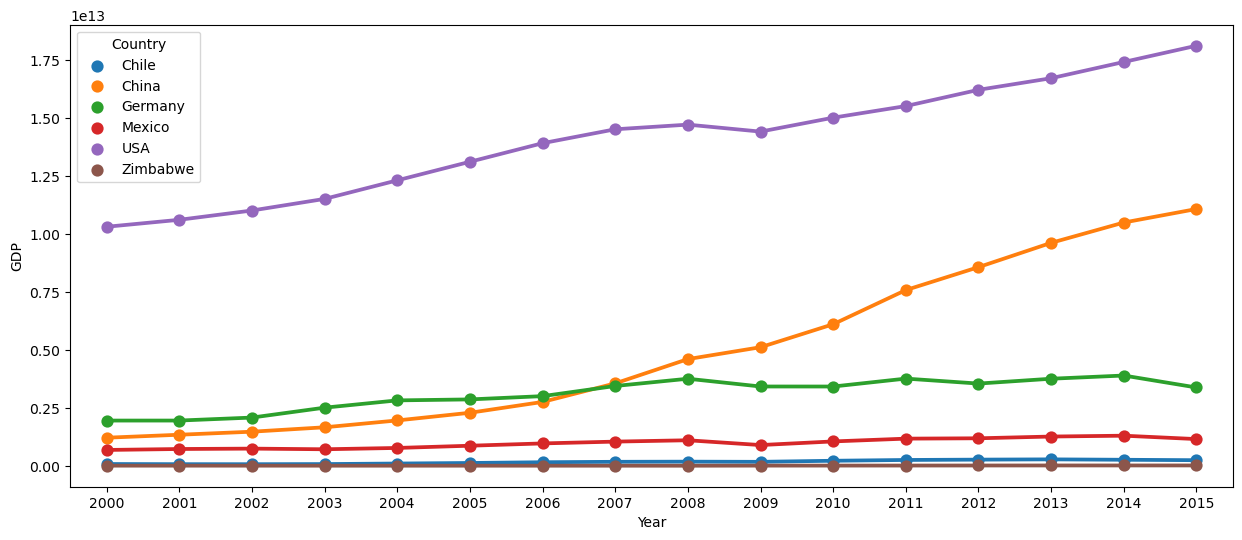

In [105]:
f, ax = plt.subplots(figsize=(15,6))
ax = sns.pointplot(data=data, x = "Year", y = "GDP", hue = "Country")
plt.show()
plt.close()

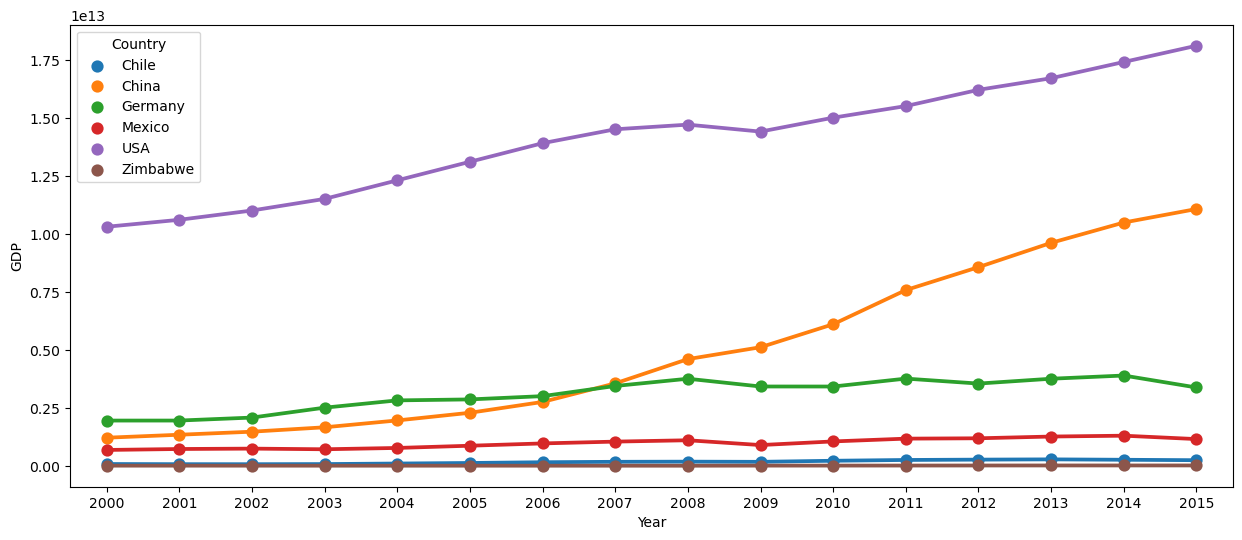

In [107]:
f, ax = plt.subplots(figsize=(15,6))

ax = sns.pointplot(data = data, x = "Year", y = "GDP", hue = "Country")

plt.show()
plt.close()

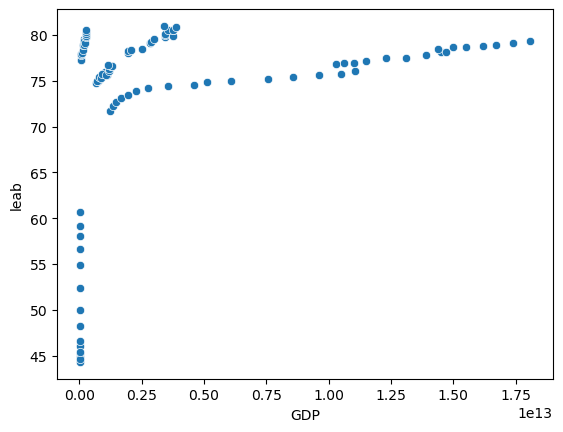

In [102]:
sns.scatterplot(data = data, x = "GDP", y = "leab" )
plt.show()
plt.close()

Use StandardScaler for Z-transformation

In [103]:
gdp_all = data["GDP"]
leab_all = data["leab"]

gdp_all = np.array(gdp_all).reshape(-1,1)
leab_all = np.array(leab_all).reshape(-1,1)

scaler = StandardScaler()
gdp_all_scaled = scaler.fit_transform(gdp_all)
leab_all_scaled = scaler.fit_transform(leab_all)

print(np.mean(gdp_all_scaled))
print(np.mean(leab_all_scaled))

# flatten 2D arrays
gdp_all_flat = gdp_all_scaled.ravel()
leab_all_flat = leab_all_scaled.ravel()



-5.551115123125783e-17
-6.291263806209221e-16


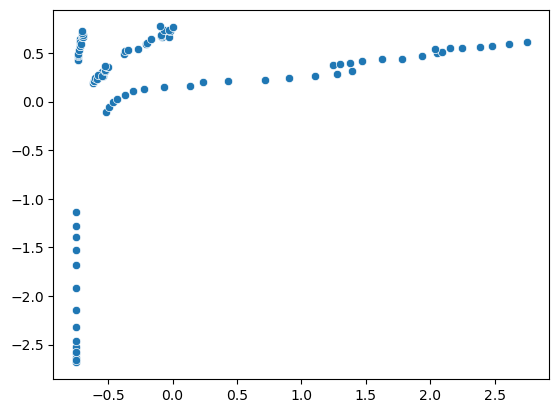

In [104]:
sns.scatterplot(x=gdp_all_flat, y= leab_all_flat)
plt.show()
plt.close()